In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df =  pd.read_csv('/content/healthcare_cleaned.csv.csv')
df.head()

,Patient Name,Age,Gender,Condition,Medication,Visit Date,Blood Pressure,Cholesterol,Email,Phone Number
0,david lee,25.0,Other,Heart Disease,METFORMIN,01/15/2020,140/90,200.0,name@hospital.org,555-555-5555
1,emily davis,40.0,Male,Diabetes,NONE,"April 5, 2018",120/80,200.0,No Email,Not Provided
2,laura martinez,35.0,Other,Asthma,METFORMIN,2019.12.01,110/70,160.0,contact@domain.com,Not Provided
3,michael wilson,40.0,Male,Diabetes,ALBUTEROL,01/15/2020,110/70,180.0,name@hospital.org,555-555-5555
4,david lee,40.0,Female,Asthma,NONE,2020/02/20,110/70,180.0,No Email,Not Provided


In [ ]:
df.loc[0, 'Age']= 150
df.loc[1, 'Age'] = 0
df.loc[2, 'Cholesterol']= 600
df.loc[3, 'Cholesterol'] = 5
df.head()

,Patient Name,Age,Gender,Condition,Medication,Visit Date,Blood Pressure,Cholesterol,Email,Phone Number
0,david lee,150.0,Other,Heart Disease,METFORMIN,01/15/2020,140/90,200.0,name@hospital.org,555-555-5555
1,emily davis,0.0,Male,Diabetes,NONE,"April 5, 2018",120/80,200.0,No Email,Not Provided
2,laura martinez,35.0,Other,Asthma,METFORMIN,2019.12.01,110/70,600.0,contact@domain.com,Not Provided
3,michael wilson,40.0,Male,Diabetes,ALBUTEROL,01/15/2020,110/70,5.0,name@hospital.org,555-555-5555
4,david lee,40.0,Female,Asthma,NONE,2020/02/20,110/70,180.0,No Email,Not Provided


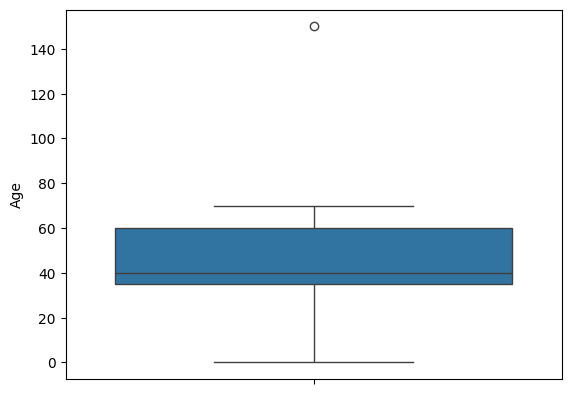

In [ ]:
sns.boxplot(df['Age'])
plt.show()

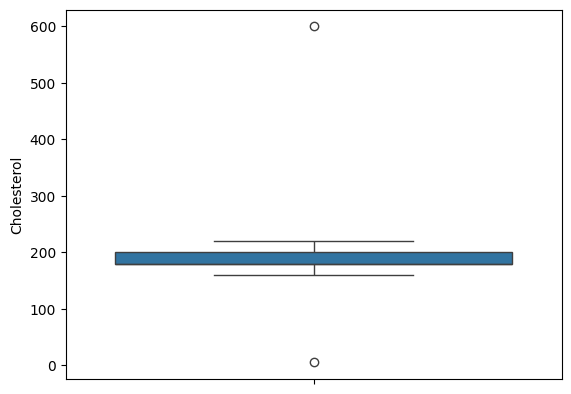

In [ ]:
sns.boxplot(df['Cholesterol'])
plt.show()

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_limit) | (df['Age'] > upper_limit)]
print(outliers)

  Patient Name    Age Gender      Condition Medication  Visit Date  \
0   david lee   150.0  Other  Heart Disease  METFORMIN  01/15/2020   

  Blood Pressure  Cholesterol              Email  Phone Number  
0         140/90        200.0  name@hospital.org  555-555-5555  


In [ ]:
df = df[(df['Age']>= lower_limit) & (df['Age']<= upper_limit)]
df.head()


,Patient Name,Age,Gender,Condition,Medication,Visit Date,Blood Pressure,Cholesterol,Email,Phone Number
1,emily davis,0.0,Male,Diabetes,NONE,"April 5, 2018",120/80,200.0,No Email,Not Provided
2,laura martinez,35.0,Other,Asthma,METFORMIN,2019.12.01,110/70,600.0,contact@domain.com,Not Provided
3,michael wilson,40.0,Male,Diabetes,ALBUTEROL,01/15/2020,110/70,5.0,name@hospital.org,555-555-5555
4,david lee,40.0,Female,Asthma,NONE,2020/02/20,110/70,180.0,No Email,Not Provided
5,mary clark,40.0,Male,Hypertension,METFORMIN,03-25-2019,140/90,180.0,No Email,Not Provided


In [ ]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Cholesterol'] < lower_limit) | (df['Cholesterol'] > upper_limit)]
print(outliers)

       Patient Name   Age Gender Condition Medication  Visit Date  \
2   laura martinez   35.0  Other    Asthma  METFORMIN  2019.12.01   
3   michael wilson   40.0   Male  Diabetes  ALBUTEROL  01/15/2020   

  Blood Pressure  Cholesterol               Email  Phone Number  
2         110/70        600.0  contact@domain.com  Not Provided  
3         110/70          5.0   name@hospital.org  555-555-5555  


In [ ]:
df.loc[df['Cholesterol']> upper_limit,'Cholesterol'] = upper_limit
df.loc[df['Cholesterol']<lower_limit,'Cholesterol'] = lower_limit
df.head()

,Patient Name,Age,Gender,Condition,Medication,Visit Date,Blood Pressure,Cholesterol,Email,Phone Number
1,emily davis,0.0,Male,Diabetes,NONE,"April 5, 2018",120/80,200.0,No Email,Not Provided
2,laura martinez,35.0,Other,Asthma,METFORMIN,2019.12.01,110/70,230.0,contact@domain.com,Not Provided
3,michael wilson,40.0,Male,Diabetes,ALBUTEROL,01/15/2020,110/70,150.0,name@hospital.org,555-555-5555
4,david lee,40.0,Female,Asthma,NONE,2020/02/20,110/70,180.0,No Email,Not Provided
5,mary clark,40.0,Male,Hypertension,METFORMIN,03-25-2019,140/90,180.0,No Email,Not Provided


In [ ]:
df_cleaned =df
df_cleaned.to_csv('healthcare_cleaned_outliers_handled.csv', index= False)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scale =['Age','Cholesterol']

In [ ]:
scaler = MinMaxScaler()
df[scale] = scaler.fit_transform(df[scale])

In [ ]:
df.head()

,Patient Name,Age,Gender,Condition,Medication,Visit Date,Blood Pressure,Cholesterol,Email,Phone Number
1,emily davis,0.000000,Male,Diabetes,NONE,"April 5, 2018",120/80,0.625,No Email,Not Provided
2,laura martinez,0.500000,Other,Asthma,METFORMIN,2019.12.01,110/70,1.000,contact@domain.com,Not Provided
3,michael wilson,0.571429,Male,Diabetes,ALBUTEROL,01/15/2020,110/70,0.000,name@hospital.org,555-555-5555
4,david lee,0.571429,Female,Asthma,NONE,2020/02/20,110/70,0.375,No Email,Not Provided
5,mary clark,0.571429,Male,Hypertension,METFORMIN,03-25-2019,140/90,0.375,No Email,Not Provided


In [8]:
def age_group(age):
  if age <=18:
    return 'Child'
  elif age <=35:
    return 'Young '
  elif age <=60:
    return 'Adult'
  else:
    return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)

In [18]:
df['Is_on_Medication'] = df['Medication'].apply(lambda x: 'No' if x== 'NONE' else 'Yes')

In [19]:
df['Is_on_Medication'].head()

,Is_on_Medication
0,Yes
1,No
2,Yes
3,Yes
4,No


In [30]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/',expand=True)
df['Systolic'].unique()

array(['140', '120', '110', 'Not Recorded', '130'], dtype=object)

In [36]:
df['Systolic'].replace('Not Recorded',0, inplace=True)

/tmp/ipython-input-36-2351131064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Systolic'].replace('Not Recorded',0, inplace=True)


In [37]:
df['Systolic'].unique()

array(['140', '120', '110', 0, '130'], dtype=object)

In [44]:
def bp_category(systolic):
  if int(systolic) >= 140:
    return 'High'
  elif int(systolic) >= 120:
    return 'Pre-Hypertension'
  else:
    return 'Normal'

df['BP_Category'] = df['Systolic'].apply(bp_category)

In [45]:
df.head()


,Patient Name,Age,Gender,Condition,Medication,Visit Date,Blood Pressure,Cholesterol,Email,Phone Number,Age_Group,Is_on_Medication,Systolic,Diastolic,BP_Category
0,david lee,25.0,Other,Heart Disease,METFORMIN,01/15/2020,140/90,200.0,name@hospital.org,555-555-5555,Young,Yes,140,90,High
1,emily davis,40.0,Male,Diabetes,NONE,"April 5, 2018",120/80,200.0,No Email,Not Provided,Adult,No,120,80,Pre-Hypertension
2,laura martinez,35.0,Other,Asthma,METFORMIN,2019.12.01,110/70,160.0,contact@domain.com,Not Provided,Young,Yes,110,70,Normal
3,michael wilson,40.0,Male,Diabetes,ALBUTEROL,01/15/2020,110/70,180.0,name@hospital.org,555-555-5555,Adult,Yes,110,70,Normal
4,david lee,40.0,Female,Asthma,NONE,2020/02/20,110/70,180.0,No Email,Not Provided,Adult,No,110,70,Normal


In [46]:
df_cleaned =df
df_cleaned.to_csv('healthcare_cleaned_outliers_handled.csv', index= False)